<a href="https://colab.research.google.com/github/DjordjevicA/Projekat/blob/main/DIGITALNA%20OBRADA%20SLIKE%20KORI%C5%A0%C4%86ENJEM%20OPENCV%20BIBLIOTEKE%20U%20GOOGLE%20COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

## 1.Učitavanje slike u radno okruženje, konverzija u sivu sliku (engl. „grayscale“) i prikaz slike

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SlikaA.bmp to SlikaA.bmp


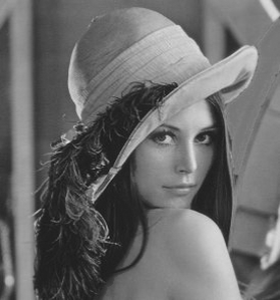

In [5]:
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
cv2_imshow(img)

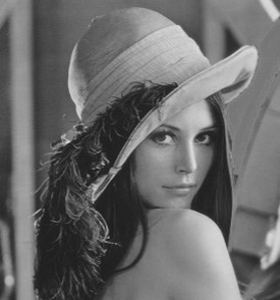

In [6]:
# Konverzija u sivu skalu
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Prikaz sive slike
cv2_imshow(gray_img)

## 2.	Skaliranje, tj. promenu veličine slike (smanjivanje i uvećanje)

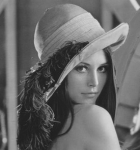

In [7]:
# Skaliranje slike (smanjivanje na 50% originalne veličine)
scaled_img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

# Prikaz smanjene slike
cv2_imshow(scaled_img)

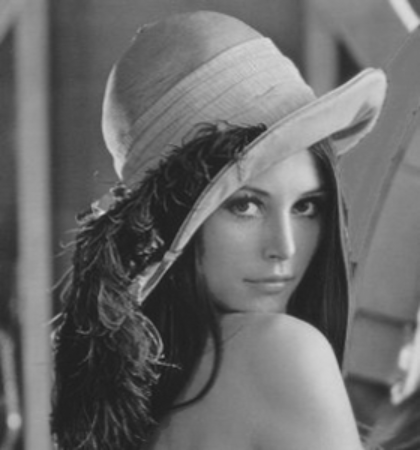

In [8]:
# Skaliranje slike (uvećanje na 150% originalne veličine)
enlarged_img = cv2.resize(img, (0, 0), fx=1.5, fy=1.5)

# Prikaz uvećane slike
cv2_imshow(enlarged_img)

## 3.	Odsecanje dela slike (engl. crop)

Original image shape (300, 280, 3)


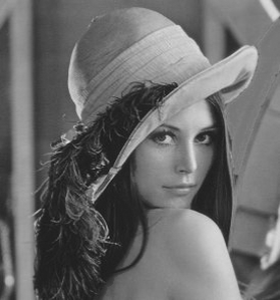

cropped image shape (170, 200, 3)


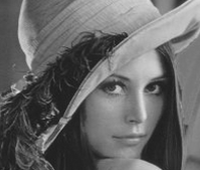

In [9]:
# Ispis dimenzija slike
print("Original image shape", img.shape)
# Prikaz početne slike
cv2_imshow(img)

# Definisanje odsečka
cropped_image = img[50:220, 50:250]

# Ispis dimenzija početne slike
print("cropped image shape", cropped_image.shape)

# Prikaz odsečene slike
cv2_imshow(cropped_image)


## 4.	Rotacija slike za određeni ugao (korišćenjem različitih tipova interpolacija)

In [10]:
# Ugao rotacije
angle = 45

# Dimenzije slike
(h, w) = img.shape[:2]

# Određujemo centar slike
center = (w // 2, h // 2)

# Kreiramo matricu rotacije
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Rotiramo sliku koristeći različite tipove interpolacija
rotated_nearest = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_NEAREST)
rotated_linear = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR)
rotated_cubic = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC)

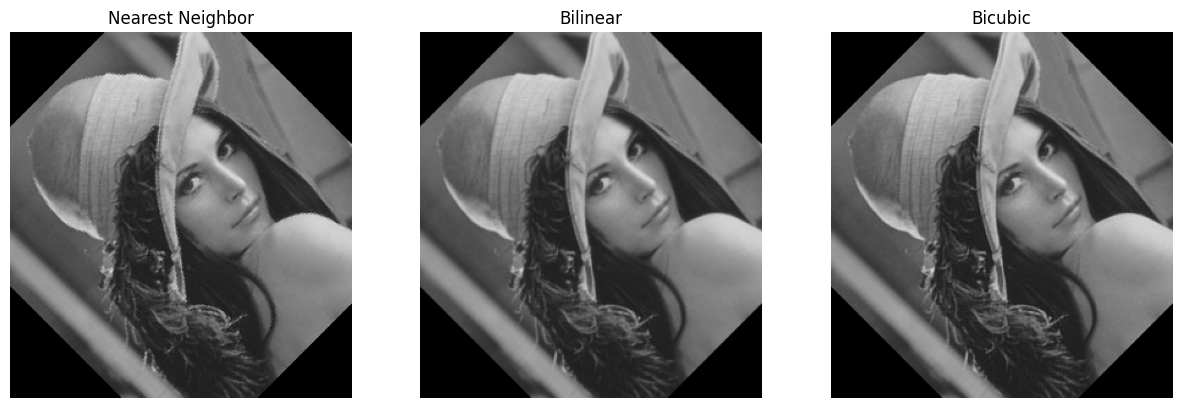

In [11]:
from matplotlib import pyplot as plt

# Prikaz rotiranih slika
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Nearest Neighbor')
plt.imshow(cv2.cvtColor(rotated_nearest, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bilinear')
plt.imshow(cv2.cvtColor(rotated_linear, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Bicubic')
plt.imshow(cv2.cvtColor(rotated_cubic, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


## 5.	Anotacija (označavanje – engl. annotation) slike sa različitim geometrijskim oblicima kao što su linija, krug, pravougaonik, tekst i dr.

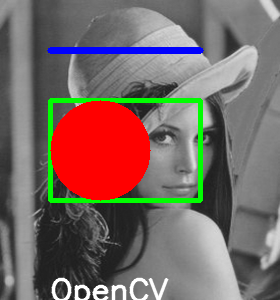

In [12]:
imgA = img.copy()
# Anotacija linijom
cv2.line(imgA, (50, 50), (200, 50), (255, 0, 0), 5)

# Anotacija pravougaonikom
cv2.rectangle(imgA, (50, 100), (200, 200), (0, 255, 0), 3)

# Anotacija krugom
cv2.circle(imgA, (100, 150), 50, (0, 0, 255), -1)

# Anotacija tekstom
cv2.putText(imgA, 'OpenCV', (50, 300), cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 255, 255), 2, cv2.LINE_AA)

# Prikaz anotirane slike
cv2_imshow(imgA)

## 6.	Konverzija RGB slike u druge palete boja (BGR, HSV, Lab – CIELAB, YcrCb...) i segmentaciju slike sa određenom vrednošću boje korišćenjem tih paleta

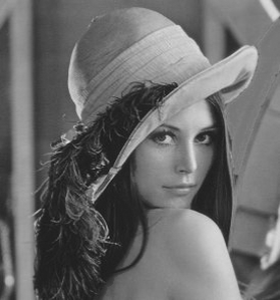

In [13]:
original_img = img.copy()
# Konverzija u BGR (OpenCV koristi BGR kao podrazumevanu paletu)
bgr_img = original_img.copy()
cv2_imshow(bgr_img)

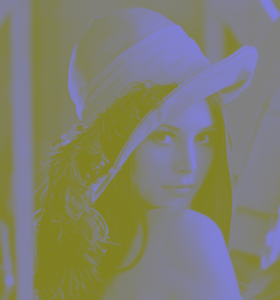

In [14]:
#Konverzija BGR u LAB
imgLAB = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
cv2_imshow(imgLAB)

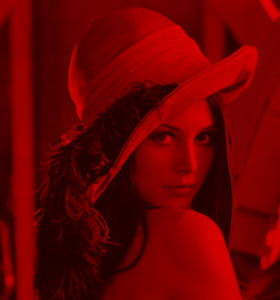

In [15]:
#Konverzija BGR u HSV
imgHSV = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)
cv2_imshow(imgHSV)

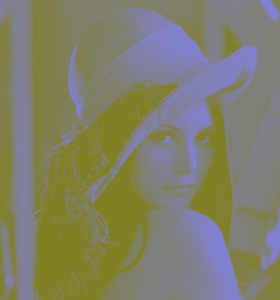

In [16]:
# Konverzija BGR u YCrCb
ycrcb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2YCrCb)
cv2_imshow(ycrcb_img)

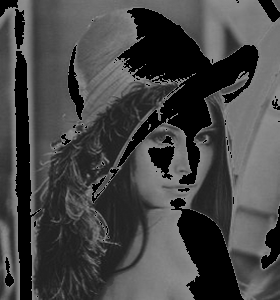

In [17]:
import numpy as np
bgr = [100, 150, 1] # ciljаna boja u BGR formatu
thresh = 140 # prag vrednost za segmentaciju boja

# donja granica za segmentaciju boja u BGR
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
# gornja granica za segmentaciju boja u BGR
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
# binarna maska gde su pikseli unutar određenog opsega postavljeni na belo, a ostali na crno
maskBGR = cv2.inRange(original_img, minBGR, maxBGR)
# bitovska operacija AND između slike i maske da bi se zadržali samo pikseli u određenom opsegu boja
resultBGR = cv2.bitwise_and(original_img, original_img, mask=maskBGR)
cv2_imshow(resultBGR)


## 7.	Normalizacija slike i generisanje slike slične učitanoj (engl. data augmentation)

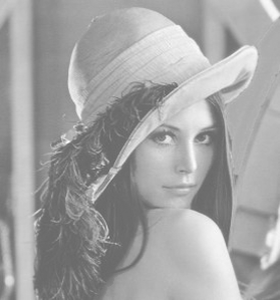

In [18]:
import numpy as np
def normalize_image(img):
    # Konvertujемо sliku u float32
    img_float32 = img.astype(np.float32)

    return cv2.normalize(img_float32, None,
                                     100, 255, cv2.NORM_MINMAX)

# Normalizujемо sliku
normalized_img = normalize_image(img)

# Prikaz normalizovane slike
cv2_imshow(normalized_img)

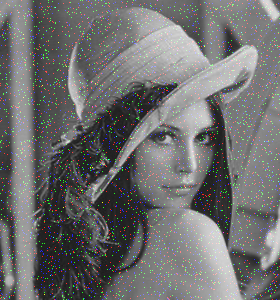

In [19]:
def generate_similar_image(img, noise_factor=0.5):

    # Generišemo slučajni šum iz normalne distribucije
    noise = np.random.normal(scale=noise_factor,
                             size=img.shape).astype(np.uint8)

    # Dodajemo šum referentnoj slici
    similar_image = cv2.add(img, noise)

    return similar_image

# Uverimo se da referentna slika nije prazna
if img is not None:
    # Generišemo sličnu sliku sa slučajnim šumom
    similar_img = generate_similar_image(img)

    # Prikaz slične slike
    cv2_imshow(similar_img)

## 8.	Primena različitih vrsta kernela za filtriranje slike (konvolucioni, glačajući (engl. blurring), medijana, filter za izoštravanje, itd.)

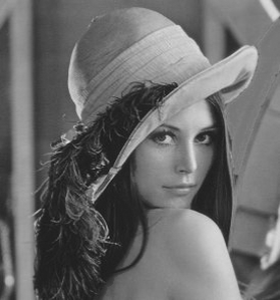

In [20]:
# Definišеmo identitetski filter ili kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

# Primenjujemo kelner na sliku
identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)
# Prikaz slike
cv2_imshow(identity)

Glačajući kernel

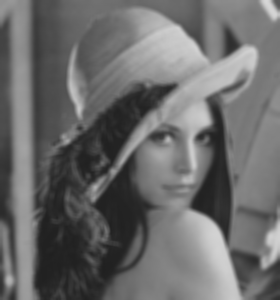

In [ ]:
# Definisanje kelnera
kernel2 = np.ones((5, 5), np.float32) / 25

# Primena kernela
imgk = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)
cv2_imshow(imgk)

Medijana filter

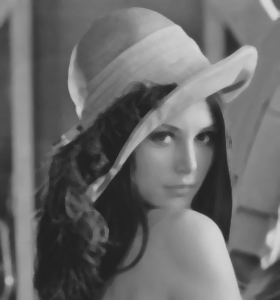

In [ ]:
median = cv2.medianBlur(src=img, ksize=5)
cv2_imshow(median)

Filter za izoštravanje

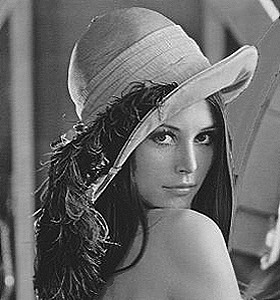

In [ ]:
# Definisanje kernela
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
# Definisanje filtera za izoštravanje
sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel3)
# Prikaz slike
cv2_imshow(sharp_img)

## 9.	Binarizacija slike korišćenjem više načina zadavanja praga vrednosti (engl. threshold)

Korišćenje binarnog praga

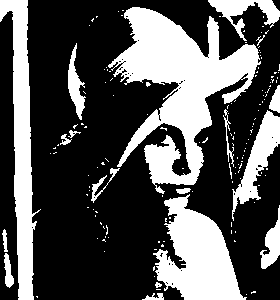

In [ ]:
# Osnovni primer threshold-a
th, dst = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY);
cv2_imshow(dst)

Korišćenje inverznog binarnog praga

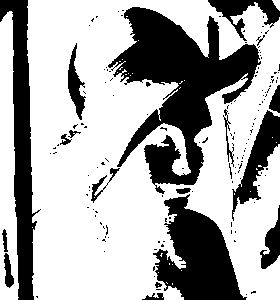

In [ ]:
th, dst = cv2.threshold(gray_img,127,255, cv2.THRESH_BINARY_INV)
cv2_imshow(dst)

Korišćenje praga sa odsecanjem

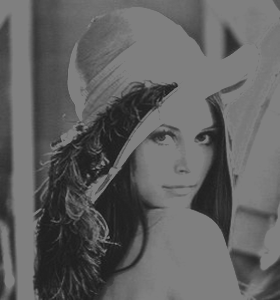

In [ ]:
th, dst = cv2.threshold(gray_img,127,255, cv2.THRESH_TRUNC)
cv2_imshow(dst)

Korišćenje praga sa postavljanjem na nulu

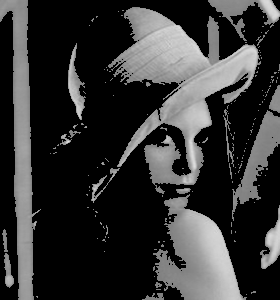

In [ ]:
th, dst = cv2.threshold(gray_img,127,255, cv2.THRESH_TOZERO);
cv2_imshow(dst)


Korišćenje inverznog praga sa postavljanjem na nulu

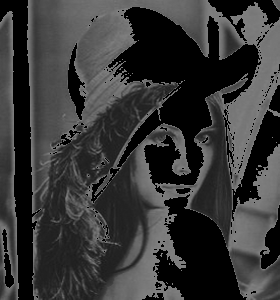

In [ ]:
th, dst = cv2.threshold(gray_img,127,255, cv2.THRESH_TOZERO_INV);
cv2_imshow(dst)


Adaptivna binarizacija

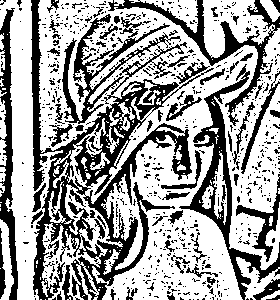

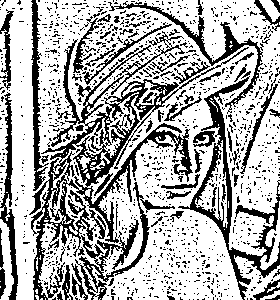

In [ ]:
# Adaptivna binarizacija (mean)
adaptive_mean_img = cv2.adaptiveThreshold(gray_img, 255,
                                          cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Adaptivna binarizacija (gaussian)
adaptive_gaussian_img = cv2.adaptiveThreshold(gray_img, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Prikaz adaptivne binarizovane slike
cv2_imshow(adaptive_mean_img)
cv2_imshow(adaptive_gaussian_img)

Otsu-ova binarizacija

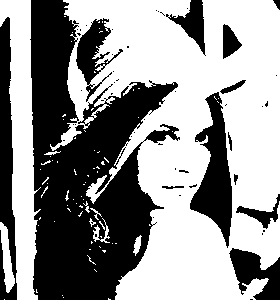

In [ ]:
 _, otsu_img = cv2.threshold(gray_img, 0, 255,
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Prikaz Otsu-ove binarizovane slike
cv2_imshow(otsu_img)

## 10.	Detekcija ivica na slici korišćenjem Sobel, Canny i drugih operatora i detekcije kontura.

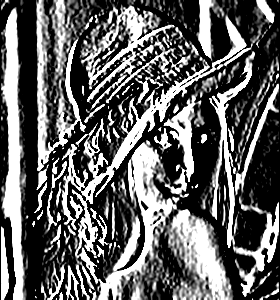

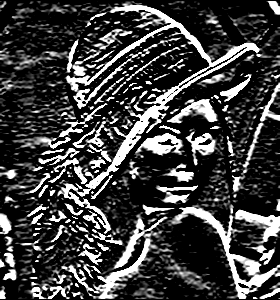

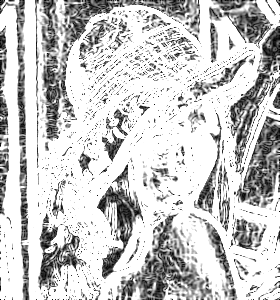

In [ ]:
# Primenjujemo Sobel operator
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)  # Sobel u X pravcu
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)  # Sobel u Y pravcu

# Kombinujemo Sobel X i Y
sobel_combined = cv2.magnitude(sobelx, sobely)

# Prikaz slike sa Sobel operatorom
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(sobel_combined)

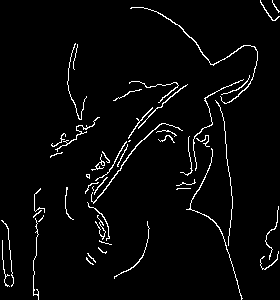

In [ ]:
# Primenа Gaussian blur-а za smanjenje šuma
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Primenа Canny edge detection-а
edges = cv2.Canny(blurred_img, 100, 200)

# Prikaz slikе sa detektovanim ivicama
cv2_imshow(edges)

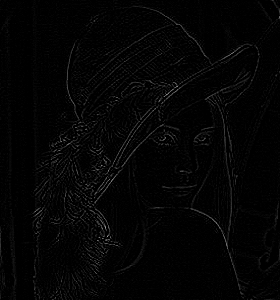

In [ ]:
# Primenа Laplacian operator-а
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)

# Prikaz slike sa Laplacian operatorom
cv2_imshow(laplacian)

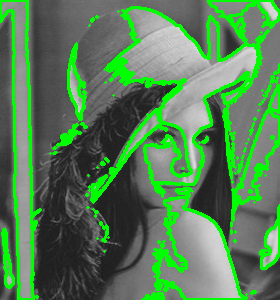

In [ ]:
# Binarizacija slike
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Detekcija kontura
contours, _ = cv2.findContours(binary_img, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)

# Kopiramo originalnu sliku za crtanje kontura
contour_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Prikaz slike sa konturama
cv2_imshow(contour_img)